Nugroho Budianggoro, 01/02/2022

This script is to analyze human stampedes data by means of k-means clustering and two methods of topic modeling.

In [1]:
# Imports

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction import text
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.preprocessing import normalize

In [2]:
# Get the dataset

url = "https://github.com/nugi1209/NadiData.com/raw/main/2021_12_16_human_stampedes_DATASET.csv"
df = pd.read_csv(url)
df.head()

,Event ID,Event Name,Date,Number of Deaths,Country,Place,Description
0,1,1807 Newgate disaster,1807-02-23,30,United Kingdom,"Newgate Prison,\nLondon",Dozens of spectators were crushed to death whe...
1,2,-,1809-03-29,5000,Portugal,Ponte das Barcas [pt]\nOporto,Thousands of Portuguese civilians died trying ...
2,3,Carnival tragedy of 1823,1823-02-12,110,Malta,Valletta,About 110 boys died in a crush while attemptin...
3,4,Theatre Royal disaster,1849-02-19,65,United Kingdom,"Glasgow, Scotland","A human crush occurred at the Theatre Royal, D..."
4,5,-,1865-01-16,20,United Kingdom,"Dundee, Scotland",A crush occurred during admissions into Bell S...


In [3]:
# Clean and lemmatize data.
# The cleaning involves transforming string to lowercase and put together words if all characters in word are text

lemmatizer = WordNetLemmatizer()
clean_data = []
for doc in df['Description']:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha())
    clean_data.append(doc_cleaned)

In [4]:
# Add stop words that can decrease insight and initiated vectorizer

add_stop_words = ['killed', 'injured', 'stampede', 'least', 'crowd', 'died', 'one', 'police', 'trying', 'people',
                  'many', 'crushed', 'death', 'three', 'women', 'two', 'occured', 'others', 'fell', 'caused', 'wa',
                  'leading', 'number', 'trampled', 'rushed', 'causing', 'day', 'near', 'deaths', 'get', 'tried',
                  'new', 'later', 'end', 'following', 'injuries', 'crush', 'person', 'tear', 'panic', 'india', 'occurred',
                 'ghat', 'saree', 'bihar', 'sabarimala', 'uttar', 'jamarat', 'dasehra']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
vectorizer = TfidfVectorizer(stop_words=stop_words)

In [5]:
# Vectorize and then normalize data

data = vectorizer.fit_transform(clean_data)
data = normalize(data)

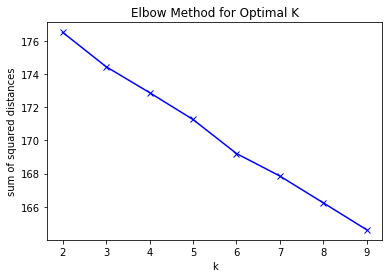

In [6]:
# Create elbow method visualization to get optimum number of cluster

sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(data)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [7]:
# Use the optimum number of cluster to build the clustering

k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=9, random_state=42)

In [8]:
# Count the occurence of data points for each cluster

clusters = kmeans.labels_
print(Counter(clusters))

Counter({0: 69, 1: 22, 5: 21, 3: 18, 2: 15, 4: 13, 8: 9, 7: 8, 6: 8})


In [9]:
# Try to get to 10 most common words for each cluster along with the cluster number
# and the occurence of data points of each cluster

# Get unique cluster labels
labels = np.unique(clusters)

# Transform vectorized data to array
data_array = data.toarray()

# Create counter for data points of each cluster
counter = Counter(clusters)

data_array.shape

(183, 1135)

In [25]:
# Process one cluster at a time
for label in labels:
#     Print cluster label
    print('Cluster: {}'.format(label))
    print('Data count: {}'.format(counter[label]))
#     Get the index of the data points from the cluster currently being processed
    id_temp = np.where(clusters==label)
#     Get the average tfidf score of every word feature from all data points
    x_means = np.mean(data_array[id_temp], axis = 0) # returns average score across cluster
#     Get sorted index of features based on average score    
    sorted_means = np.argsort(x_means)[::-1][:10]
#     Get feature column names to be incorporated to the results
    features = vectorizer.get_feature_names()
#     Get two dimension list of features and their score based on the sorted features
    best_features = [(features[i], x_means[i]) for i in sorted_means]
#     Add column names to the sorted features two-dimentional list
    df = pd.DataFrame(best_features, columns = ['features', 'score'])
    print(df)

Cluster: 0
Data count: 69
data_array[id_temp]
(69, 1135)
x_means
(1135,)
      features     score
0      concert  0.036887
1  overcrowded  0.026687
2        dozen  0.023477
3     teenager  0.023335
4         club  0.020331
5      falling  0.018976
6         city  0.017919
7      refugee  0.015889
8        group  0.015541
9          rap  0.015272
Cluster: 1
Data count: 22
data_array[id_temp]
(22, 1135)
x_means
(1135,)
    features     score
0    stadium  0.277521
1        cup  0.065624
2      match  0.061136
3        fan  0.061130
4      enter  0.047245
5      world  0.041225
6   football  0.040121
7  spectator  0.037436
8      north  0.035795
9      broke  0.033835
Cluster: 2
Data count: 15
data_array[id_temp]
(15, 1135)
x_means
(1135,)
   features     score
0   stoning  0.177419
1   pilgrim  0.160637
2     devil  0.111215
3     mecca  0.099487
4     saudi  0.097911
5      hajj  0.082120
6      exit  0.079230
7    ritual  0.078625
8    bridge  0.072004
9  incident  0.060410
Cluster: 3


In [11]:
# prediction = kmeans.predict(X)
# labels = np.unique(prediction)
# X_toarray = X.toarray()
# dfs = []
# for label in labels:
#     id_temp = np.where(prediction==label) # indices for each cluster
#     x_means = np.mean(X_toarray[id_temp], axis = 0) # returns average score across cluster
#     sorted_means = np.argsort(x_means)[::-1][:10] # indices with top 20 scores
#     features = vectorizer.get_feature_names()
#     best_features = [(features[i], x_means[i]) for i in sorted_means]
#     df = pd.DataFrame(best_features, columns = ['features', 'score'])
#     dfs.append(df)

# dfs




In [12]:
# prediction = kmeans.predict(X)
# labels = np.unique(prediction)
# X_toarray = X.toarray()
# for label in labels:
#     print("Label: {}".format(label))
#     id_temp = np.where(prediction==label) # indices for each cluster
#     x_means = np.mean(X_toarray[id_temp], axis = 0) # returns average score across cluster
#     sorted_means = np.argsort(x_means)[::-1][:10] # indices with top 20 scores
#     features = vectorizer.get_feature_names()
#     best_features = [(features[i], x_means[i]) for i in sorted_means]
#     df = pd.DataFrame(best_features, columns = ['features', 'score'])
#     print(df)
    
# >>> terms = tfidf_vector.get_feature_names()
# >>> centroids = kmeans.cluster_centers_
# >>> for cluster, index_list in cluster_label.items():
# ...     counter = Counter(cluster_label[cluster])
# ...     print('cluster_{}: {} samples'.format(cluster, len(index_list)))
# ...     for label_index, count in sorted(counter.items(),
#                                key=lambda x: x[1], reverse=True):
# ...         print('{}: {} samples'.format(label_names[label_index], count))
# ...     print('Top 10 terms:')
# ...     for ind in centroids[cluster].argsort()[-10:]:
# ...         print(' %s' % terms[ind], end="")
# ...     print()

In [13]:
# tf_idf_norm = normalize(tf_idf)
# tf_idf_array = tf_idf_norm.toarray()

# def get_top_features_cluster(tf_idf_array, prediction, n_feats):
#     labels = np.unique(prediction)
#     dfs = []
#     for label in labels:
#         id_temp = np.where(prediction==label) # indices for each cluster
#         x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
#         sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
#         features = tf_idf_vectorizor.get_feature_names()
#         best_features = [(features[i], x_means[i]) for i in sorted_means]
#         df = pd.DataFrame(best_features, columns = ['features', 'score'])
#         dfs.append(df)
#     return dfs
# dfs = get_top_features_cluster(tf_idf_array, prediction, 15)

In [14]:
# clusters = kmeans.predict(X)
# terms = vectorizer.get_feature_names()
# centroids = kmeans.cluster_centers_
# X

In [15]:
# labels = kmeans.predict(X)
# cluster_label = {i: labels[np.where(clusters==i)] for i in range(k)}
# terms = vectorizer.get_feature_names()
# centroids = kmeans.cluster_centers_
# for cluster, index_list in cluster_label.items():
#     counter = Counter(cluster_label[cluster])
#     print('cluster {}: {} samples'.format(cluster, len(index_list)))
#     print('Top 10 terms:')
#     for ind in centroids[cluster].argsort()[-10]:
#         print(' %s' % terms[ind], end="")
#     print()

In [16]:
# from sklearn.datasets import fetch_20newsgroups
# categories = ['sci.space']
# groups = fetch_20newsgroups(subset='all', categories=categories)
# labels = groups.target

In [17]:
# label_names = groups.target_names
# print(label_names)
# print(labels)
# print(len(labels))